In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../aprobados_reprobados.csv')

In [4]:
data = data.drop('Unnamed: 0',axis=1)
data

,ID,Session 2,Session 3,Session 4,Session 5,Session 6,Nota primera oportunidad,Nota segunda oportunidad,aprobar,notaMax,intento
0,1,5.0,0.0,4.5,4.0,2.25,0.0,94.5,1,94.5,2
1,2,4.0,3.5,4.5,4.0,1.00,0.0,44.0,0,44.0,2
2,3,3.5,3.5,4.5,4.0,0.00,85.0,0.0,1,85.0,1
3,4,6.0,4.0,5.0,3.5,2.75,0.0,30.0,0,30.0,2
4,5,5.0,4.0,5.0,4.0,2.75,0.0,38.5,0,38.5,2
...,...,...,...,...,...,...,...,...,...,...,...
110,111,3.0,0.0,0.0,3.0,0.00,0.0,0.0,0,0.0,0
111,112,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0
112,113,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0
113,114,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.0,0


### separa los datos de entrenamiento con los de testing 

In [5]:
X_data = data[["Session 2","Session 3","Session 4","Session 5","Session 6"]]
Y_data = data[['aprobar']]

In [6]:
X = X_data.index.to_numpy()
Y = Y_data.index.to_numpy()

In [7]:
list(range(1,6))

[1, 2, 3, 4, 5]

### K-FOLD

In [8]:
skf = StratifiedKFold(n_splits=7)
for train_index , test_index in skf.split(X_data,Y_data):
    X_train, X_test = X[train_index], X[test_index]
    Y_train , Y_test = Y[train_index], Y[test_index] 

In [9]:
X_train = X_data.iloc[X_train].to_numpy()
Y_train = Y_data.iloc[Y_train].to_numpy()
X_test = X_data.iloc[X_test].to_numpy()
Y_test = Y_data.iloc[Y_test].to_numpy()

## entrenamiento del modelo 

> tuneo del modelo 

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report, plot_confusion_matrix  

In [51]:
clf_rf = RandomForestClassifier()

parameters = { 
    'n_estimators':[50,100,150,200,225,250],
    'criterion': ['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[None, 5,10,15,20]                  
}

# clf_svc = RandomizedSearchCV(clf_svc, param_distributions=parameters, scoring="accuracy", cv=5, n_jobs=-1, n_iter=15)
clf_rf = GridSearchCV(clf_rf, param_grid=parameters, scoring="accuracy", cv=5, n_jobs=-1)
model_rf = clf_rf.fit(X_train, Y_train)

print("Best score : ", model_rf.best_score_)
print("Best Parameters : ", model_rf.best_params_)
print("Accuracy Score : ", accuracy_score(model_rf.predict(X_test), Y_test))

/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best score :  0.6989473684210527
Best Parameters :  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150}
Accuracy Score :  0.8125


In [13]:
clf = RandomForestClassifier(n_estimators=150, max_features="log2" ,max_depth=5, criterion="gini")
clf.fit(X_train, Y_train)


<ipython-input-13-74a3c22a4d38>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=150)

In [ ]:
# y_pred = clf.predict(X_test)
# accuracy_score(Y_test,y_pred)
# print(accuracy_score(Y_test, y_pred))

### Obtener las metricas

In [17]:
def getMetricas(x_Test,y_Test,svc):
    grid_predictions = svc.predict(x_Test)
    disp = plot_confusion_matrix(svc,x_Test,y_Test,display_labels=['Reprueba','Aprueba'],cmap=plt.cm.Blues)
    disp.ax_.set_title('Matriz de confusión')
    plt.show()
    print(classification_report(y_Test,grid_predictions))

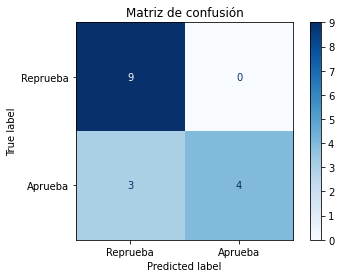

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.57      0.73         7

    accuracy                           0.81        16
   macro avg       0.88      0.79      0.79        16
weighted avg       0.86      0.81      0.80        16



In [20]:
getMetricas(X_test,Y_test,clf)